# Ist der FCB stärker oder schwächer geworden als letzte Saison?

**Erfahrung:**

- Balkengraphik, quer: Total aller Spiele der Neuverplichtungen, alle Vereine in einer Graphik.
- Dasselbe vs. Abgänge, gleiche Grafik.

**Tore, Körpergrösse, Vorlagen:**

- 10 x Für jeden einzelnen Verein, Steckbrief wie sie bei den Transfers abgeschnitten haben.

**Marktwert vs Tore**

- Scatterplot aller Verein. Highlights der einzelnen Spieler.

**Dabei Geld verdient:**

- Einnahmen und Ausgaben


# Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
import dateutil.parser
import re
import time

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
datestring = time.strftime("%m-%h-%d")
datestring

'07-Jul-22'

# Functions for Scraper

In [2]:
#Function to pick every other player, as the scraper receives duplicates
def removing_every_other_player(x):
    return x[::2]

In [3]:
#Functions for visiting players profil page. Problem was, that the test pages I used, 
#didn't correspond to the ones I was then scraping. The used the language compile selection,
#with English phrases. But the Phrases I should have been using, should have been in German.
#And the there were things like 'Grösse'with a German double S.
def alter(player):
    try:
        return player.find('th', text = re.compile('Alter:')).findNext('td').string
    except:
        return None

In [4]:
def im_team_seit(player):
    try:
        return player.find('th', text = re.compile('Im Team seit:')).findNext('td').string.strip()
    except:
        return None

In [5]:
def groesse(player):
    try:
        return int(player.find('th', text = re.compile('Größe:')).findNext('td').string.replace(',', '').replace(' m', ''))
    except:
        return None

In [6]:
def position(player):
    if player == None:
        return None
    else:
        return player.find('th', text = re.compile('Position:'))\
    .findNext('td').string.strip()

In [7]:
def club(player):
    if player.find('th', text = re.compile('Aktueller Verein:')).string.strip() == 'Aktueller Verein:':
        return player.find('th', text = re.compile('Aktueller')).findNext('td').findNext('a').find('img').get('alt')
    elif player.find('th', text = re.compile('Current club:')).string.strip() == 'Current club:':
        return player.find('th', text = re.compile('Current club:')).findNext('td').findNext('a').find('img').get('alt')
    else:
        return 

In [8]:
#Function to extract the player's earlier club
def ex_club(player):
    try:
        return player.find('td', {'class': 'hauptlink no-border-links hide-for-small vereinsname'}).findNext('a').string
    except:
        return None

In [9]:
def agent(player):
    try:
        return player.find('th', text = re.compile("Spielerberater:"))\
    .findNext('td').findNext('a').get('title')
    except:
        return None

In [10]:
def shoes(player):
    try:
        return player.find('th', text = re.compile("Ausrüster:")).findNext('td')\
    .findNext('a').findNext('img').get('title')
    except:
        return None

In [11]:
def marktwert(player):
    try:
        return player.find('div', {'class': 'right-td'}).findNext('a').text.replace(',', '').replace(' Mio. €', '0000').replace(' Tsd. €', '0000')
    except:
        return None

In [12]:
def ausgeliehen_von(player):
    try:
        return player.find('th', text = re.compile("Ausgeliehen von:")).findNext('td').find('a').text
    except:
        return None

In [13]:
def Minuten(x):
    try:
        return int(x.find('td', {'class': 'zentriert'}).find_next('td', {'class': 'rechts'}).string.replace("'", ''))
    except:
        return None

# Happy Scraping

In [14]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [15]:
#url = "http://www.transfermarkt.com/raiffeisen-super-league/transfers/wettbewerb/C1/saison_id/2016"
url = "http://www.transfermarkt.ch/raiffeisen-super-league/transfers/wettbewerb/C1/saison_id/2016"
response = requests.get(url, headers=headers)
transfermarkt_soup = BeautifulSoup(response.text, 'html.parser')

In [16]:
transfermarkt = transfermarkt_soup.find_all('a', {'class': 'spielprofil_tooltip'})

In [17]:
#not sure why this playing starts the scraped list. Keep an eye on this
transfermarkt.pop(0)
#Only picking every other player
transfermarkt = removing_every_other_player(transfermarkt)

In [18]:
transfer_dict = []

for spieler in transfermarkt:
    
    #Name
    Name = spieler.string
    print(Name)
    
    #Link
    spieler_link = spieler['href']
    spieler_link = 'http://www.transfermarkt.ch' + spieler_link
    #print(spieler_link)
    
    #Visiting players profil pages
    spieler_profil = requests.get(spieler_link, headers=headers)
    spieler_profil = BeautifulSoup(spieler_profil.text, 'html.parser')
    #print(spieler_profil)
    
    Alter = alter(spieler_profil)
    #print(Alter)
    Grösse = groesse(spieler_profil)
    #print(Grösse)
    Position = position(spieler_profil)
    #print(Position)
    Verein = club(spieler_profil)
    #print(Verein)
    Ex_Verein = ex_club(spieler_profil)
    #print(Ex_Verein)
    Agent = agent(spieler_profil)
    #print(Agent)
    Ausrüster = shoes(spieler_profil)
    #print(Ausrüster)
    Im_team_seit = im_team_seit(spieler_profil)
    #print(Im_team_seit)
    Marktwert = marktwert(spieler_profil)
    Ausgeliehen_von = ausgeliehen_von(spieler_profil)
    #print(Marktwert)
    #print(Marktwert)
    
    #Visiting Leistungsdaten pages
    spieler_leistungsdaten_link = spieler_link.replace('profil', 'leistungsdaten')
    spieler_leistungsdaten_link = spieler_leistungsdaten_link + '/plus/0?saison=ges'
    spieler_leistungsdaten = requests.get(spieler_leistungsdaten_link, headers=headers)
    spieler_leistungsdaten = BeautifulSoup(spieler_leistungsdaten.text, 'html.parser')
    print(spieler_leistungsdaten_link)
    
    #This is okay to do in a list, as every footballer has these parameters
    Spiele = spieler_leistungsdaten.find('tfoot')
    leistungsdaten = Spiele.find_all('td', {'class': 'zentriert'})
    leistungsdaten_list = []
    for Daten in leistungsdaten:
        Daten = Daten.string
        leistungsdaten_list.append(Daten)
    
    if len(leistungsdaten_list) > 6:
        Totalspiele = int(leistungsdaten_list[0].replace('-', '0'))
        Tore = int(leistungsdaten_list[1].replace('-', '0'))
        Vorlagen = 0
        Gelbe_Karten = int(leistungsdaten_list[2].replace('-', '0'))
        Gelb_Rote_Karten = int(leistungsdaten_list[3].replace('-', '0'))
        Rote_Karten = int(leistungsdaten_list[4].replace('-', '0'))
    
    else:
        Totalspiele = int(leistungsdaten_list[0].replace('-', '0'))
        Tore = int(leistungsdaten_list[1].replace('-', '0'))
        Vorlagen = int(leistungsdaten_list[2].replace('-', '0'))
        Gelbe_Karten = int(leistungsdaten_list[3].replace('-', '0'))
        Gelb_Rote_Karten = int(leistungsdaten_list[4].replace('-', '0'))
        Rote_Karten = int(leistungsdaten_list[5].replace('-', '0'))
        #print(leistungsdaten_list)
    
    #Minuten = Minuten(Spiele)
    
    Spieler_Dict = {"Name": Name,
                    "Alter": Alter,
                    "URL": spieler_link,
                    "Grösse": Grösse,
                    "Position": Position,
                    "Verein": Verein,
                    "Wechsel von": Ex_Verein,
                    "Ausgeliehen von": Ausgeliehen_von,
                    "Agent": Agent,
                    "Ausrüster": Ausrüster,
                    "Im Team seit": Im_team_seit,
                    "Total Spiele": Totalspiele,
                    "Tore": Tore,
                    "Vorlagen": Vorlagen,
                    "Gelbe Karten": Gelbe_Karten,
                    "Gelb-Rote Karten": Gelb_Rote_Karten,
                    "Rote Karten": Rote_Karten,
                    'Marktwert': Marktwert,
                    'Minuten': Minuten
                    }
    
    transfer_dict.append(Spieler_Dict)

Éder Balanta
http://www.transfermarkt.ch/eder-balanta/leistungsdaten/spieler/265127/plus/0?saison=ges
Mohamed Elyounoussi
http://www.transfermarkt.ch/mohamed-elyounoussi/leistungsdaten/spieler/186644/plus/0?saison=ges
Seydou Doumbia
http://www.transfermarkt.ch/seydou-doumbia/leistungsdaten/spieler/75287/plus/0?saison=ges
Blas Riveros
http://www.transfermarkt.ch/blas-riveros/leistungsdaten/spieler/401732/plus/0?saison=ges
Omar Gaber
http://www.transfermarkt.ch/omar-gaber/leistungsdaten/spieler/144340/plus/0?saison=ges
Kevin Bua
http://www.transfermarkt.ch/kevin-bua/leistungsdaten/spieler/252080/plus/0?saison=ges
Geoffroy Serey Dié
http://www.transfermarkt.ch/geoffroy-serey-die/leistungsdaten/spieler/77708/plus/0?saison=ges
Djordje Nikolic
http://www.transfermarkt.ch/djordje-nikolic/leistungsdaten/spieler/274344/plus/0?saison=ges
Ahmed Hamoudi
http://www.transfermarkt.ch/ahmed-hamoudi/leistungsdaten/spieler/158011/plus/0?saison=ges
Zdravko Kuzmanović
http://www.transfermarkt.ch/zdravko-k

# Creating and prepping the Dataframe

In [19]:
#Making the DataFrame
df_transfers = pd.DataFrame(transfer_dict)

In [20]:
df_transfers[df_transfers['Verein'] == 'Grasshopper Club Zürich'].head()

,Agent,Alter,Ausgeliehen von,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von
21,ManMark S.A.,21,None,None,0,7,184.0,05.07.2016,2000000,<function Minuten at 0x10d50bae8>,Lucas Andersen,Mittelfeld - Linksaußen,0,28,176,http://www.transfermarkt.ch/lucas-andersen/pro...,Grasshopper Club Zürich,15,Ajax Amsterdam
22,Five Stars Sports,27,None,Nike Mercurial Superfly V FG - Spark Brilliance,0,18,188.0,01.07.2016,1500000,<function Minuten at 0x10d50bae8>,Ridge Munsy,Sturm - Mittelstürmer,0,93,262,http://www.transfermarkt.ch/ridge-munsy/profil...,Grasshopper Club Zürich,12,FC Thun
23,Total Football,26,None,None,0,21,178.0,07.07.2016,7500000,<function Minuten at 0x10d50bae8>,Rúnar Már Sigurjónsson,Mittelfeld - Zentrales Mittelfeld,0,28,163,http://www.transfermarkt.ch/runar-mar-sigurjon...,Grasshopper Club Zürich,16,GIF Sundsvall
24,None,22,None,None,0,11,174.0,01.07.2016,4500000,<function Minuten at 0x10d50bae8>,Numa Lavanchy,Abwehr - Rechter Verteidiger,0,19,116,http://www.transfermarkt.ch/numa-lavanchy/prof...,Grasshopper Club Zürich,9,Lausanne-Sport
26,DF-Sportmanagement GmbH,22,None,None,0,26,185.0,01.07.2012,9000000,<function Minuten at 0x10d50bae8>,Levent Gülen,Abwehr - Innenverteidiger,0,0,134,http://www.transfermarkt.ch/levent-gulen/profi...,Grasshopper Club Zürich,2,FC Vaduz


In [21]:
#Dealing with the loan problem. Sorting out only the loaned players. Moving column to the back. 
#Deleting last club column. Renaming the loaned column. Then concating it with the original file.
#So now the last club column is correct. 
df_ausgeliehen = df_transfers[df_transfers['Ausgeliehen von'].notnull()]

def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

#moving column to the back
df = change_column_order(df_ausgeliehen, 'Ausgeliehen von', 17)

del df['Wechsel von']

#Renaming last column
df.columns = df.columns.str.replace('Ausgeliehen von','Wechsel von')

#Prepping original dataframe
df_transfers = df_transfers[df_transfers['Ausgeliehen von'].isnull()]

del df_transfers['Ausgeliehen von']

#concating the two
df_SL_transfers = pd.concat([df, df_transfers], ignore_index=True)

#Dropping any duplicate values
df_SL_transfers = df_SL_transfers.drop_duplicates()

In [22]:
###### Making sure all the clubs are spelt correctly:

#Dealing with the FCB problem. Two different names for FCB, Lausanne, GC, FCSG in the columns.
def fcb_lausanne(x):
    return x.replace(' 1893', '').replace('Grasshoppers', 'Grasshopper Club Zürich').replace('Lausanne-Sport', 'FC Lausanne-Sport').replace('FC St. Gallen', 'FC St. Gallen 1879')

def fcb(x):
    return x.replace(' 1893', '')

df_SL_transfers['*Wechsel von*'] = df_SL_transfers['Wechsel von'].apply(fcb_lausanne)
df_SL_transfers['*Verein*'] = df_SL_transfers['Verein'].apply(fcb)

In [23]:
df_SL_transfers.describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Gelb-Rote Karten,Gelbe Karten,Grösse,Rote Karten,Tore,Total Spiele,Vorlagen
count,165.000000,165.000000,164.000000,165.000000,165.000000,165.000000,165.000000
mean,0.703030,22.993939,181.457317,0.624242,22.751515,155.660606,9.303030
std,1.088881,20.212136,5.998313,1.026191,28.000959,103.775819,10.999681
min,0.000000,0.000000,166.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,8.000000,NaN,0.000000,3.000000,77.000000,1.000000
50%,0.000000,19.000000,NaN,0.000000,15.000000,134.000000,5.000000
75%,1.000000,30.000000,NaN,1.000000,29.000000,202.000000,14.000000
max,6.000000,142.000000,196.000000,5.000000,163.000000,500.000000,57.000000


# Interesting facts and figures

In [24]:
#Top, most active agents:
df_SL_transfers['Agent'].value_counts().head()

 Ohne Berater                10
Gold-Kick & Sport Service     8
Familienangehöriger           7
Footuro AG                    6
SPORTFRONT GmbH               4
Name: Agent, dtype: int64

In [25]:
#Which shoes are they playing with?
df_SL_transfers['Ausrüster'].value_counts().head()

Nike Mercurial Superfly V FG - Spark Brilliance     14
Nike Mercurial Vapor XI FG - Spark Brilliance        9
Nike Tiempo Legend VI FG - Spark Brilliance          6
Nike Hypervenom Phinish II FG - Spark Brilliance     3
Nike Magista Obra FG - Spark Brilliance              1
Name: Ausrüster, dtype: int64

In [26]:
df_SL_transfers['Rote Karten'].sort_values(ascending=False).head(3)

62    5
81    4
72    4
Name: Rote Karten, dtype: int64

In [27]:
df_SL_transfers[df_SL_transfers['Rote Karten'] == 5] 

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*
62,None,28,None,1,40,181.0,08.07.2016,2500000,<function Minuten at 0x10d50bae8>,Marcus Diniz,Abwehr - Innenverteidiger,5,6,194,http://www.transfermarkt.ch/marcus-diniz/profi...,FC Lausanne-Sport,2,Padova,Padova,FC Lausanne-Sport


In [28]:
df_SL_transfers['Alle Karten'] = df_SL_transfers['Gelbe Karten'] + df_SL_transfers['Rote Karten'] + df_SL_transfers['Gelb-Rote Karten']
df_SL_transfers['Alle Karten'].sort_values(ascending=False).head(3)

38     147
134     96
96      89
Name: Alle Karten, dtype: int64

In [29]:
df_SL_transfers[df_SL_transfers['Alle Karten'] == 89]

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,...,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,*Verein*,Alle Karten
96,Familienangehöriger,35,None,6,81,184.0,08.07.2016,6000000,<function Minuten at 0x10d50bae8>,Ricardo Costa,...,2,24,331,http://www.transfermarkt.ch/ricardo-costa/prof...,FC Luzern,6,FC Granada,FC Granada,FC Luzern,89


# Creating Dataframes to establish gain, losses of each club

In [30]:
df_SL_Vereine = pd.read_csv("Super_League_Vereine_16_17.csv")

#FOR THE GAMES

#Importing Super League Clubs
df_SL_Vereine = pd.read_csv("Super_League_Vereine_16_17.csv")
#Merging the Files
df_SL_Zuzuege = df_SL_transfers.merge(df_SL_Vereine, left_on = '*Verein*', right_on ='SL-Verein') 
df_SL_Abgänge = df_SL_transfers.merge(df_SL_Vereine, left_on = '*Wechsel von*', right_on ='SL-Verein')
#Working out totals of bought players
Total_Minuten_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('*Verein*')['Total Spiele'].sum())
#Working out totals of sold players
Total_Minuten_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Total Spiele'].sum())
#Resetting the Index of both the new frames
Total_Minuten_Abgänge.reset_index(inplace=True)
Total_Minuten_Zuzüge.reset_index(inplace=True)
#Merging the data sets
Zuzüge_Abgänge = Total_Minuten_Zuzüge.merge(Total_Minuten_Abgänge, left_on = '*Verein*', right_on ='*Wechsel von*') 
#Working out the difference
Zuzüge_Abgänge['Transfer_Differenz_Spiele'] = Zuzüge_Abgänge['Total Spiele_x'] - Zuzüge_Abgänge['Total Spiele_y']

#Deleting the columns we don't need:
del Zuzüge_Abgänge['*Wechsel von*']
#Renaming columns
Zuzüge_Abgänge.columns = ['Verein', 'Total Spiele Zuzüge', 'Total Spiele Abgänge', 'Total-Spiel-Differenz']

#FOR THE GOALS

Total_Minuten_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('*Verein*')['Tore'].sum())
Total_Minuten_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Tore'].sum())
Total_Minuten_Abgänge.reset_index(inplace=True)
Total_Minuten_Zuzüge.reset_index(inplace=True)
Tore = Total_Minuten_Zuzüge.merge(Total_Minuten_Abgänge, left_on = '*Verein*', right_on ='*Wechsel von*')
Tore['Transfer_Differenz_Tore'] = Tore['Tore_x'] - Tore['Tore_y']
del Tore['*Wechsel von*']

#FOR THE Assists

Total_Minuten_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('*Verein*')['Vorlagen'].sum())
Total_Minuten_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Vorlagen'].sum())
Total_Minuten_Abgänge.reset_index(inplace=True)
Total_Minuten_Zuzüge.reset_index(inplace=True)
Vorlagen = Total_Minuten_Zuzüge.merge(Total_Minuten_Abgänge, left_on = '*Verein*', right_on ='*Wechsel von*')
Vorlagen['Transfer_Differenz_Vorlagen'] = Vorlagen['Vorlagen_x'] - Vorlagen['Vorlagen_y']
del Vorlagen['*Wechsel von*']

#FOR THE HEIGHT
Total_Minuten_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('*Verein*')['Grösse'].mean())
Total_Minuten_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Grösse'].mean())
Total_Minuten_Abgänge.reset_index(inplace=True)
Total_Minuten_Zuzüge.reset_index(inplace=True)
Grösse = Total_Minuten_Zuzüge.merge(Total_Minuten_Abgänge, left_on = '*Verein*', right_on ='*Wechsel von*')
Grösse['Transfer_Differenz_Vorlagen'] = Grösse['Grösse_x'] - Grösse['Grösse_y']
del Grösse['*Wechsel von*']

#Merging Zuzüge_Abgänge, Tore, Vorlagen, Grösse. Deleting the columns 
#we don't need. And renaming the ones we do.
Transferbilanz = Zuzüge_Abgänge.merge(Tore, left_on = 'Verein', right_on ='*Verein*')
Transferbilanz = Transferbilanz.merge(Vorlagen, left_on = 'Verein', right_on ='*Verein*')
Transferbilanz = Transferbilanz.merge(Grösse, left_on = 'Verein', right_on ='*Verein*')
del Transferbilanz['*Verein*_x']
del Transferbilanz['*Verein*_y']
del Transferbilanz['*Verein*']

#Renaming columns
Transferbilanz.columns = ['Verein', 'Total Spiele Zuzüge', 'Total Spiele Abgänge', 'Total-Spiel-Differenz', 'Tore-Total-Zuzüge', 'Tore-Total-Abgänge', 'Tore-Differenz', 'Vorlagen Zuzüge', 'Vorlagen Abgänge', 'Vorlagen-Differenz', 'Grösse-Schnitt Zuzüge', 'Grösse-Schnitt Abgänger', 'Grösse-Differenz']
##Making Club name also the Index, handy when making the graphs
Transferbilanz.index = Transferbilanz['Verein']

In [31]:
Transferbilanz.head(1)

,Verein,Total Spiele Zuzüge,Total Spiele Abgänge,Total-Spiel-Differenz,Tore-Total-Zuzüge,Tore-Total-Abgänge,Tore-Differenz,Vorlagen Zuzüge,Vorlagen Abgänge,Vorlagen-Differenz,Grösse-Schnitt Zuzüge,Grösse-Schnitt Abgänger,Grösse-Differenz
Verein,,,,,,,,,,,,,
BSC Young Boys,BSC Young Boys,615,1140,-525,94,266,-172,62,122,-60,181.833333,179.0,2.833333


# Finally, graphing

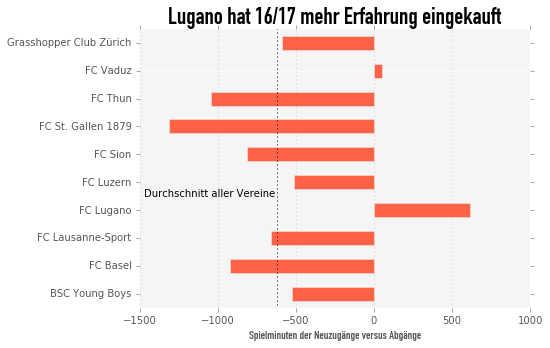

In [32]:
fig, ax = plt.subplots(figsize =(7,5))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Total-Spiel-Differenz'].plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Spielminuten der Neuzugänge versus Abgänge', **csfont, fontsize=12)
ax.set_title("Lugano hat 16/17 mehr Erfahrung eingekauft", **csfont, fontsize=24)

#Showing Median
median = Transferbilanz['Total-Spiel-Differenz'].median()
ax.plot([median, median], [-4, 10], c='black', linestyle=':')
ax.annotate(s='Durchschnitt aller Vereine', xy=(-1470,3.5), color='black')

ax.set_axisbelow(True)
plt.savefig('Erfahrung.pdf', transparent=True, bbox_inches='tight')

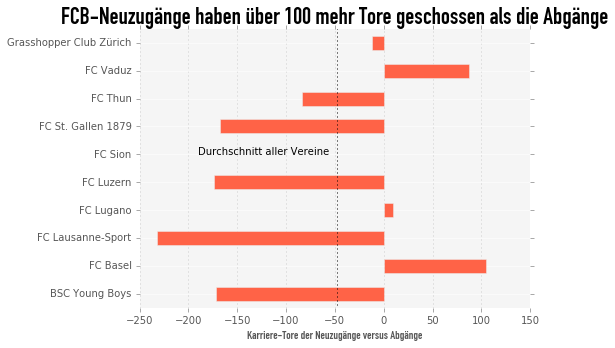

In [38]:
fig, ax = plt.subplots(figsize =(7,5))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Tore-Differenz'].plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Karriere-Tore der Neuzugänge versus Abgänge', **csfont, fontsize=12)
ax.set_title("FCB-Neuzugänge haben über 100 mehr Tore geschossen als die Abgänge", **csfont, fontsize=24)

#Showing Median
median = Transferbilanz['Tore-Differenz'].median()
ax.plot([median, median], [-4, 10], c='black', linestyle=':')
ax.annotate(s='Durchschnitt aller Vereine', xy=(-190, 5), color='black')

ax.set_axisbelow(True)
plt.savefig('Tore.pdf', transparent=True, bbox_inches='tight')

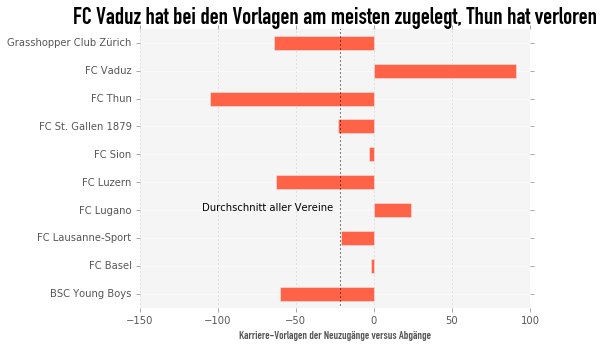

In [34]:
fig, ax = plt.subplots(figsize =(7,5))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Vorlagen-Differenz'].plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Karriere-Vorlagen der Neuzugänge versus Abgänge', **csfont, fontsize=12)
ax.set_title("FC Vaduz hat bei den Vorlagen am meisten zugelegt, Thun hat verloren", **csfont, fontsize=24)

#Showing Median
median = Transferbilanz['Vorlagen-Differenz'].median()
ax.plot([median, median], [-4, 10], c='black', linestyle=':')
ax.annotate(s='Durchschnitt aller Vereine', xy=(-110,3), color='black')

ax.set_axisbelow(True)

plt.savefig('Vorlagen.pdf', transparent=True, bbox_inches='tight')

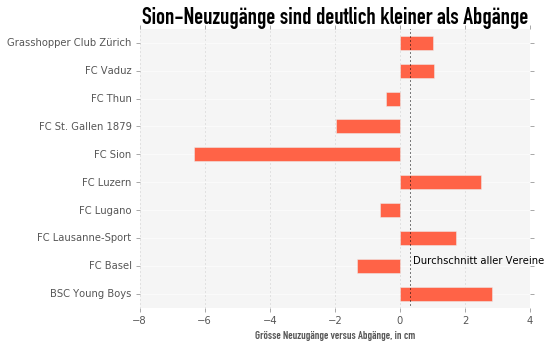

In [35]:
fig, ax = plt.subplots(figsize =(7,5))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Grösse-Differenz'].plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Grösse Neuzugänge versus Abgänge, in cm', **csfont, fontsize=12)
ax.set_title("Sion-Neuzugänge sind deutlich kleiner als Abgänge", **csfont, fontsize=24)

#Showing Median
median = Transferbilanz['Grösse-Differenz'].median()
ax.plot([median, median], [-4, 10], c='black', linestyle=':')
ax.annotate(s='Durchschnitt aller Vereine', xy=(0.4,1.1), color='black')

ax.set_axisbelow(True)

plt.savefig('Groesse.pdf', transparent=True, bbox_inches='tight')

In [36]:
pd.DataFrame(df_SL_transfers).to_csv(datestring + '16_17_SL_Transfers.csv', index=False)